# **SYNAPSE 2023 Co-Committee ML Interview Task 4**
---
> This is a Bonus Task. It is not mandatory to complete the task, but doing 
this task will fetch you brownie points and give you an edge over others in the selection process.



**Instructions**
> In task 4, we expect you to train a Machine Learning Model that can efficiently predict integer numbers from their corresponding images. It is a Deep Learning (Convolution Neural Network based) problem.

> Resources for creating the model are provided just above each cell. Do go through the material, learn the concepts and then start applying.

> Relevant code snippets are provided to simplify the process.

**The Task**
> Below is the diagram of a sample architecture that you're expected to build. After building the model, you have to write training and testing loops for the model and run it on the MNIST handwritten digits dataset.

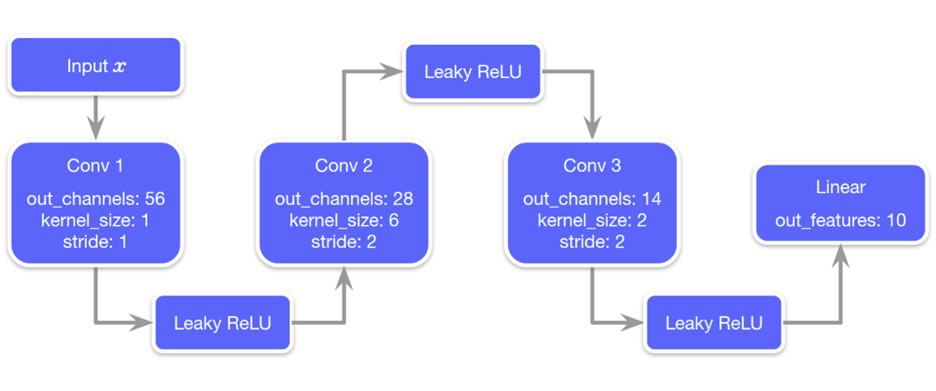

About the MNIST (Modified National Institute of Standards and Technology) Dataset: 
1.   It contains images of handwritten digits.
2.   The database contains 60,000 training images and 10,000 testing images.
3.   The dimension of images are 28*28.
4. A sample image from the dataset is given below. The corresponding label (a.k.a. target class) is mentioned just above the image.

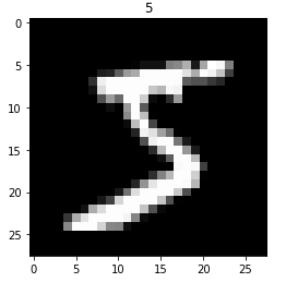

**Start Coding**
---
Step 1: Import necessary modules/packages
--
Below imported are the modules that might be useful. (You are allowed to add more packages or modify existing ones below).

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import transforms
import torch.nn as nn
from collections import OrderedDict

Step 2: Download dataset and create dataloaders
--
Next step is to download the dataset in the notebook.
To-Do:
1. Two **dataloaders** are already initialized by us.
2. You only have to write the corresponding statements on the RHS. 
3. Download training data in the train_loader variable and Testing data in test_loader variable
4. Do apply the transform as mentioned to normalize all images.


Hints:
1. https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader
2. https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.8,), (0.3,))])

#your code below
train_loader = torch.utils.data.DataLoader((torchvision.datasets.MNIST('/files/', download=True, train = True, transform = transform)))

test_loader = torch.utils.data.DataLoader((torchvision.datasets.MNIST('/files/', download=True, train = False, transform = transform)))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw



In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1])


Step 3: Build the CNN Architecture.
--
The major task is in the next cell. Here you have to subclass the torch.nn module and add different layers to the model.

**Only use the sample architecture as given**

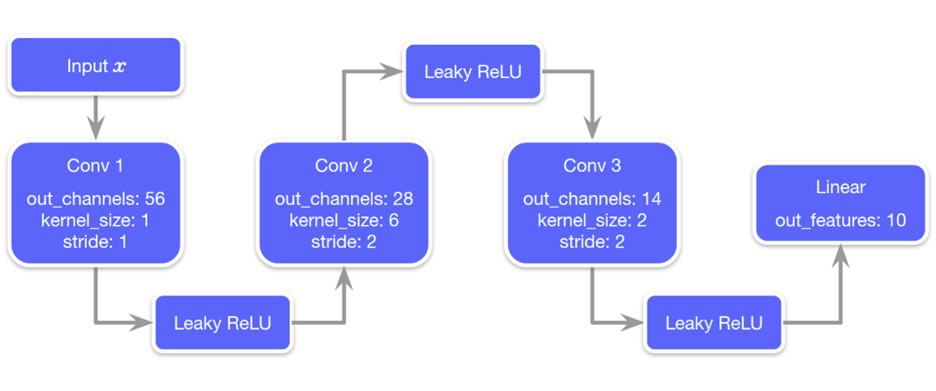

Hints:
1. Neural networks: https://www.youtube.com/watch?v=aircAruvnKk
2. CNN basics: https://www.youtube.com/watch?v=zfiSAzpy9NM
3. CNN maths and terms: https://www.youtube.com/watch?v=m8pOnJxOcqY
4. Feature learning mathematics: https://www.youtube.com/watch?v=Y1qxI-Df4Lk 
5. Examples: https://www.aiworkbox.com/lessons/how-to-subclass-the-nn-module-class-in-pytorch  /  https://www.youtube.com/watch?v=t67ZS14hw1g

In [ ]:
layer1 = nn.Sequential(OrderedDict([
            ('Conv1',nn.Conv2d(in_channels=1,out_channels=56,kernel_size=1,stride=1)),
            ('Leaky ReLU1',nn.LeakyReLU())
        ]))
layer2 = nn.Sequential(OrderedDict([
            ('Conv1',nn.Conv2d(in_channels=56,out_channels=28,kernel_size=1,stride=1)),
            ('Leaky ReLU1',nn.LeakyReLU())
        ]))
layer3 = nn.Sequential(OrderedDict([
            ('Conv3',nn.Conv2d(in_channels=28,out_channels=14,kernel_size=2,stride=2)),
            ('Leaky ReLU3',nn.LeakyReLU())
        ]))
layer4 = nn.Sequential(OrderedDict([
            ('Linear',nn.LazyLinear(out_features=10))
        ]))

In [ ]:
layer4(layer3(layer2(layer1(images)))).shape


torch.Size([1, 14, 14, 10])

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        #To-Do: Add all layers as mentioned in the diagram. You may also tune some parameters for achieving a better accuracy.
        self.layer1 = nn.Sequential(OrderedDict([
            ('Conv1',nn.Conv2d(in_channels=1,out_channels=56,kernel_size=1,stride=1)),
            ('Leaky ReLU1',nn.LeakyReLU())
        ]))
        self.layer2 = nn.Sequential(OrderedDict([
            ('Conv2',nn.Conv2d(in_channels=56,out_channels=28,kernel_size=6,stride=2)),
            ('Leaky ReLU2',nn.LeakyReLU())
        ]))
        self.layer3 = nn.Sequential(OrderedDict([
            ('Conv3',nn.Conv2d(in_channels=28,out_channels=14,kernel_size=2,stride=2)),
            ('Leaky ReLU3',nn.LeakyReLU())
        ]))
        self.layer4 = nn.Sequential(OrderedDict([
            ('Flatten',nn.Flatten()),
            ('Linear1',nn.LazyLinear(out_features=10))
        ]))
      


    def forward(self, x):
        #To-Do: Add the above created layers in forward function. Don't forget to write the "return" statement properly.
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x
        


Step 4: Choosing optimizers, loss functions for training the model
--
Hints:
1. Surf the internet and understand concepts like accuracy, loss, gradient descent, learning rate, activation, optimizers, etc for ML models.
2. Use PyTorch's documentation to complete the code in following cell. 

In [ ]:
model = Model()
criterion = torch.nn.CrossEntropyLoss()      #To-Do: Choose an appropriate loss function
optimizer = torch.optim.Adam(model.parameters(),lr=0.05) #To-Do: Choose an appropriate optimizer

print(model)

'''Output of this cell should be similar to model architecture diagram given'''

Model(
  (layer1): Sequential(
    (Conv1): Conv2d(1, 56, kernel_size=(1, 1), stride=(1, 1))
    (Leaky ReLU1): LeakyReLU(negative_slope=0.01)
  )
  (layer2): Sequential(
    (Conv2): Conv2d(56, 28, kernel_size=(6, 6), stride=(2, 2))
    (Leaky ReLU2): LeakyReLU(negative_slope=0.01)
  )
  (layer3): Sequential(
    (Conv3): Conv2d(28, 14, kernel_size=(2, 2), stride=(2, 2))
    (Leaky ReLU3): LeakyReLU(negative_slope=0.01)
  )
  (layer4): Sequential(
    (Flatten): Flatten(start_dim=1, end_dim=-1)
    (Linear1): LazyLinear(in_features=0, out_features=10, bias=True)
  )
)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


'Output of this cell should be similar to model architecture diagram given'

Step 5: Training and Testing of the model
--

In [ ]:
def train(epochs, model, loss_func, opt, dataset):
  train_loss = list()
  for epoch in range(epochs):
      total_train_loss = 0
      for i, data in enumerate(dataset, 0):
          inputs, labels = data
          opt.zero_grad()
          outputs = model(inputs)
          loss = loss_func(outputs, labels)
          total_train_loss += loss.item()
          loss.backward()
          opt.step()
          total_train_loss = total_train_loss / (i + 1)
          train_loss.append(total_train_loss)
      print('\nEpoch: {}/{}, Train Loss: {:.5f}'.format(epoch + 1, epochs, total_train_loss))
  print('=== End of Training Process ===')
  return


def predict(model, dataset):
  corr = 0
  total = 0
  with torch.no_grad():
      for data in dataset:
          images, labels = data
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          corr += (predicted == labels).sum().item()
  print('Model Accuracy on 10000 Validation Images: %d %% \n\n' % (100 * corr / total))
  figure = plt.figure(figsize=(25, 4))
  for i in np.arange(8):
      ax = figure.add_subplot(2, 4, i+1, xticks=[], yticks=[])
      ax.imshow(np.squeeze(images[i]), cmap='gray')
      ax.set_title("{} ({})".format(str(predicted[i].item()), str(labels[i].item())))
  plt.show()
  return

In [ ]:
for i, data in enumerate(train_loader, 0):
          inputs, labels = data
          outputs = model(inputs)
          print(outputs)
          #print(criterion(outputs, labels))

Streaming output truncated to the last 5000 lines.
            0.0546,  0.0630,  0.4065],
          [ 0.3592,  0.1929, -0.1785, -0.1319, -0.3365, -0.0471,  0.2615,
            0.0550,  0.0632,  0.4064]],

         [[ 0.3598,  0.1913, -0.1804, -0.1323, -0.3372, -0.0453,  0.2606,
            0.0537,  0.0615,  0.4073],
          [ 0.3604,  0.1912, -0.1802, -0.1313, -0.3374, -0.0453,  0.2607,
            0.0538,  0.0615,  0.4078],
          [ 0.3593,  0.1920, -0.1793, -0.1323, -0.3372, -0.0463,  0.2612,
            0.0544,  0.0622,  0.4068],
          [ 0.3594,  0.1918, -0.1800, -0.1321, -0.3368, -0.0459,  0.2610,
            0.0543,  0.0621,  0.4069],
          [ 0.3597,  0.1915, -0.1800, -0.1322, -0.3369, -0.0454,  0.2610,
            0.0540,  0.0616,  0.4073],
          [ 0.3595,  0.1917, -0.1799, -0.1324, -0.3370, -0.0456,  0.2610,
            0.0541,  0.0618,  0.4071]],

         [[ 0.3507,  0.2125, -0.1522, -0.1316, -0.3312, -0.0699,  0.2728,
            0.0695,  0.0826,  0.3941],
  

KeyboardInterrupt: ignored

In [ ]:
'''Understand the train function defined in above cell and use it on the training data.'''
#your code here
train(10,model,criterion,optimizer,train_loader)


Epoch: 1/10, Train Loss: 0.00000

Epoch: 2/10, Train Loss: 0.00000

Epoch: 3/10, Train Loss: 0.00000

Epoch: 4/10, Train Loss: 0.00005

Epoch: 5/10, Train Loss: 0.00000

Epoch: 6/10, Train Loss: 0.00000

Epoch: 7/10, Train Loss: 0.00000

Epoch: 8/10, Train Loss: 0.50016

Epoch: 9/10, Train Loss: 0.00000

Epoch: 10/10, Train Loss: 0.00000
=== End of Training Process ===


Model Accuracy on 10000 Validation Images: 82 % 




IndexError: ignored

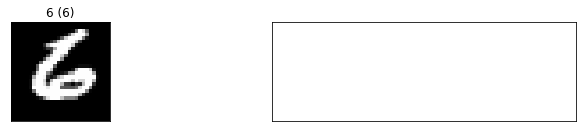

In [ ]:
'''Understand the predict function defined above and use it on the test data.'''
#your code here
predict(model,test_loader)

End of task 4
--